In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")

# Linear Regression Libraries
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.shape

(26967, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [8]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
df[df['depth'].isna()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [10]:
df['depth'].fillna(df['depth'].median(), inplace = True)

In [11]:
df[df['depth'].isna()]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [12]:
# Checking for all values - 0 in columns

for i in df.columns:
    print("Column Name:", i, "-", (df[i] == 0).sum())

Column Name: carat - 0
Column Name: cut - 0
Column Name: color - 0
Column Name: clarity - 0
Column Name: depth - 0
Column Name: table - 0
Column Name: x - 3
Column Name: y - 3
Column Name: z - 9
Column Name: price - 0


In [13]:
# All values with 0 entry updated with median values

for k in df.columns:
    if (df[k].dtypes != 'object'):
        df[k].replace(0, df[k].median(), inplace=True)

In [14]:
# checking again !!

for i in df.columns:
    print("Column Name:", i, "-", (df[i] == 0).sum())

Column Name: carat - 0
Column Name: cut - 0
Column Name: color - 0
Column Name: clarity - 0
Column Name: depth - 0
Column Name: table - 0
Column Name: x - 0
Column Name: y - 0
Column Name: z - 0
Column Name: price - 0


In [15]:
df.duplicated().sum()

34

In [16]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,5.69,5.71,3.52,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

0

In [19]:
def univariateAnalysis_numeric(column):
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()           

Distribution of carat
----------------------------------------------------------------------------


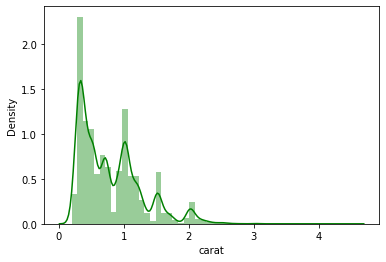

BoxPlot of carat
----------------------------------------------------------------------------


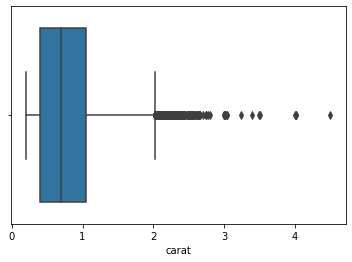

Distribution of depth
----------------------------------------------------------------------------


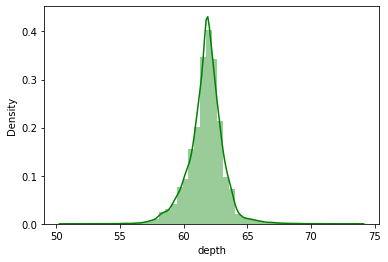

BoxPlot of depth
----------------------------------------------------------------------------


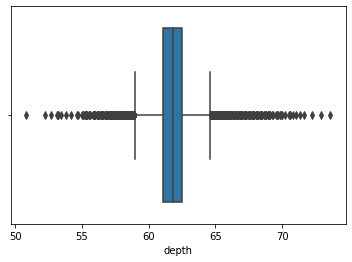

Distribution of table
----------------------------------------------------------------------------


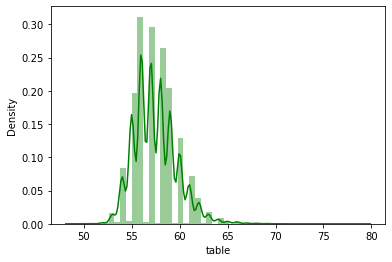

BoxPlot of table
----------------------------------------------------------------------------


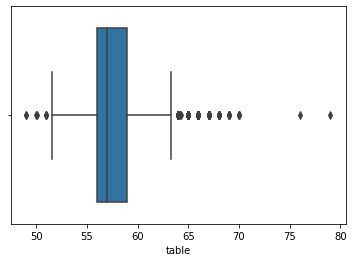

Distribution of x
----------------------------------------------------------------------------


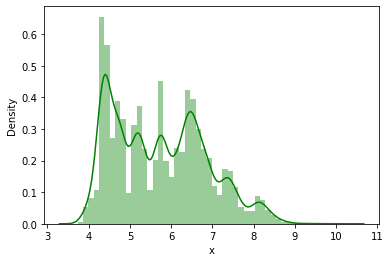

BoxPlot of x
----------------------------------------------------------------------------


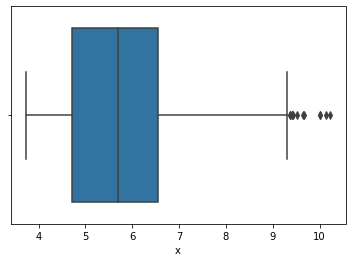

Distribution of y
----------------------------------------------------------------------------


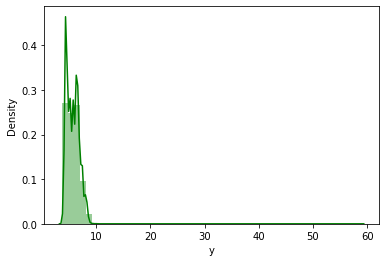

BoxPlot of y
----------------------------------------------------------------------------


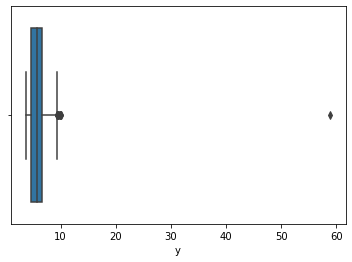

Distribution of z
----------------------------------------------------------------------------


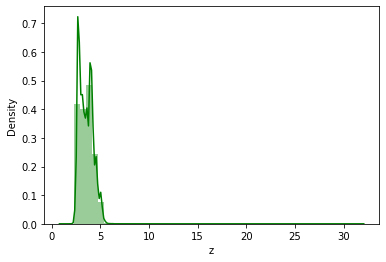

BoxPlot of z
----------------------------------------------------------------------------


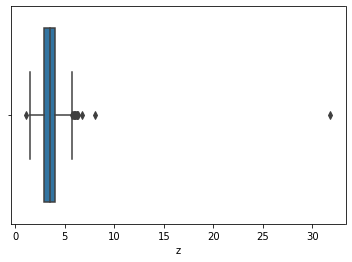

Distribution of price
----------------------------------------------------------------------------


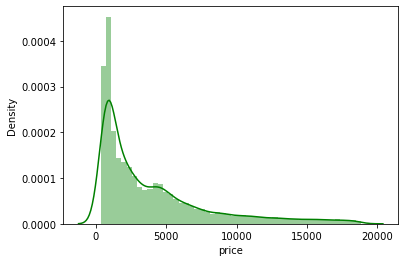

BoxPlot of price
----------------------------------------------------------------------------


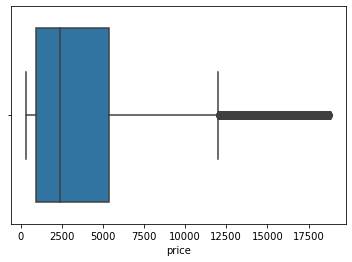

In [20]:
df_num = df.select_dtypes(include=['float64','int64'])
numericcolumns = list(df_num.columns.values)                    
                      
for i in numericcolumns:
    univariateAnalysis_numeric(i)

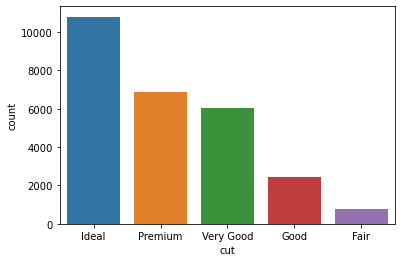

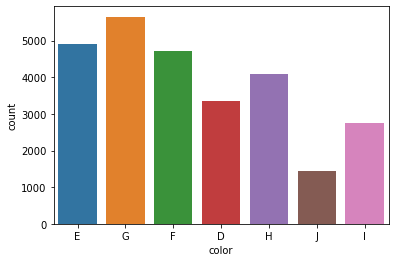

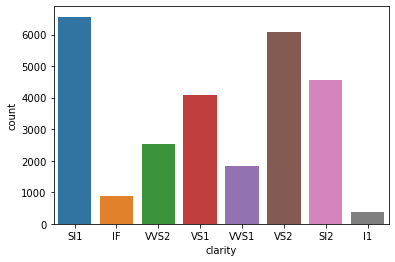

In [21]:
df_cat = df.select_dtypes(include=['object'])
for i in df_cat.columns:
    sns.countplot(x = i, data = df) 
    plt.show()

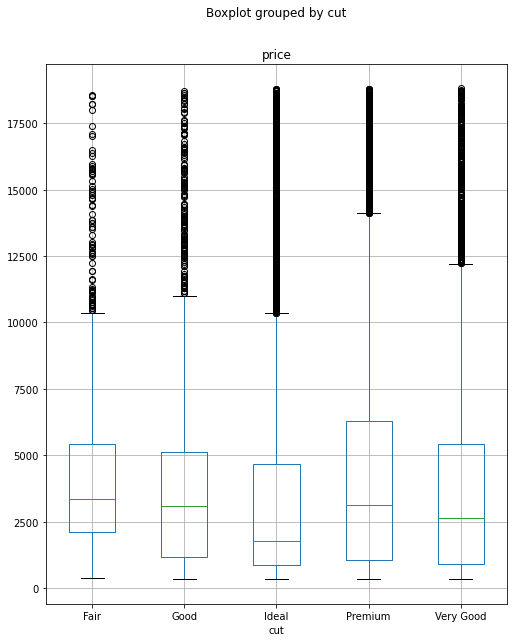

In [22]:
# Bi variant analysis

df.boxplot('price','cut',figsize=(8,10));

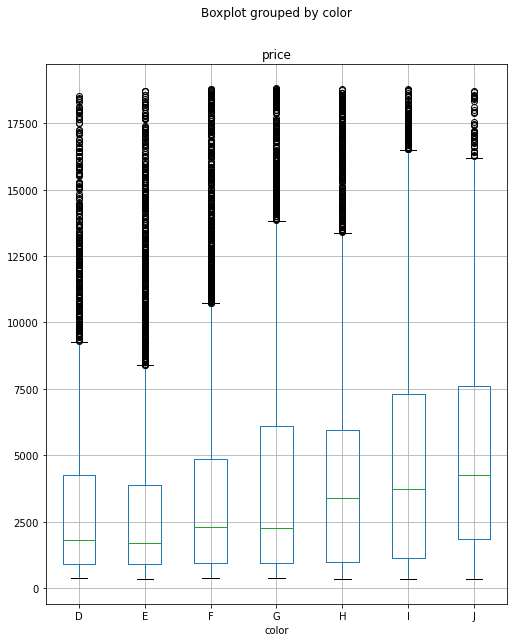

In [23]:
df.boxplot('price','color',figsize=(8,10));

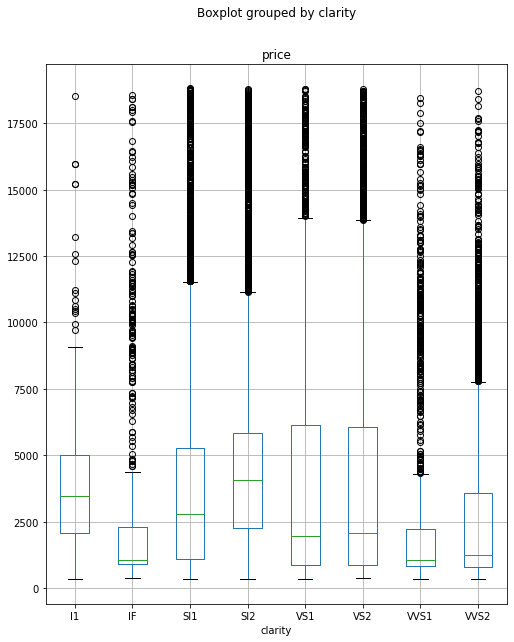

In [24]:
df.boxplot('price','clarity',figsize=(8,10));

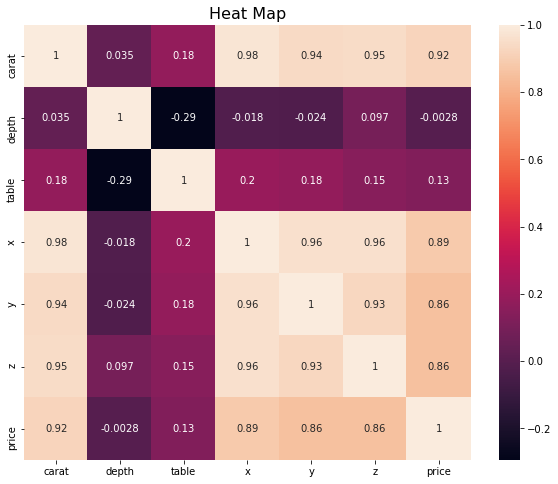

In [25]:
plt.figure(figsize = (10,8))
plt.title('Heat Map', fontsize = 16)
sns.heatmap(df.corr(),annot=True)
plt.show()

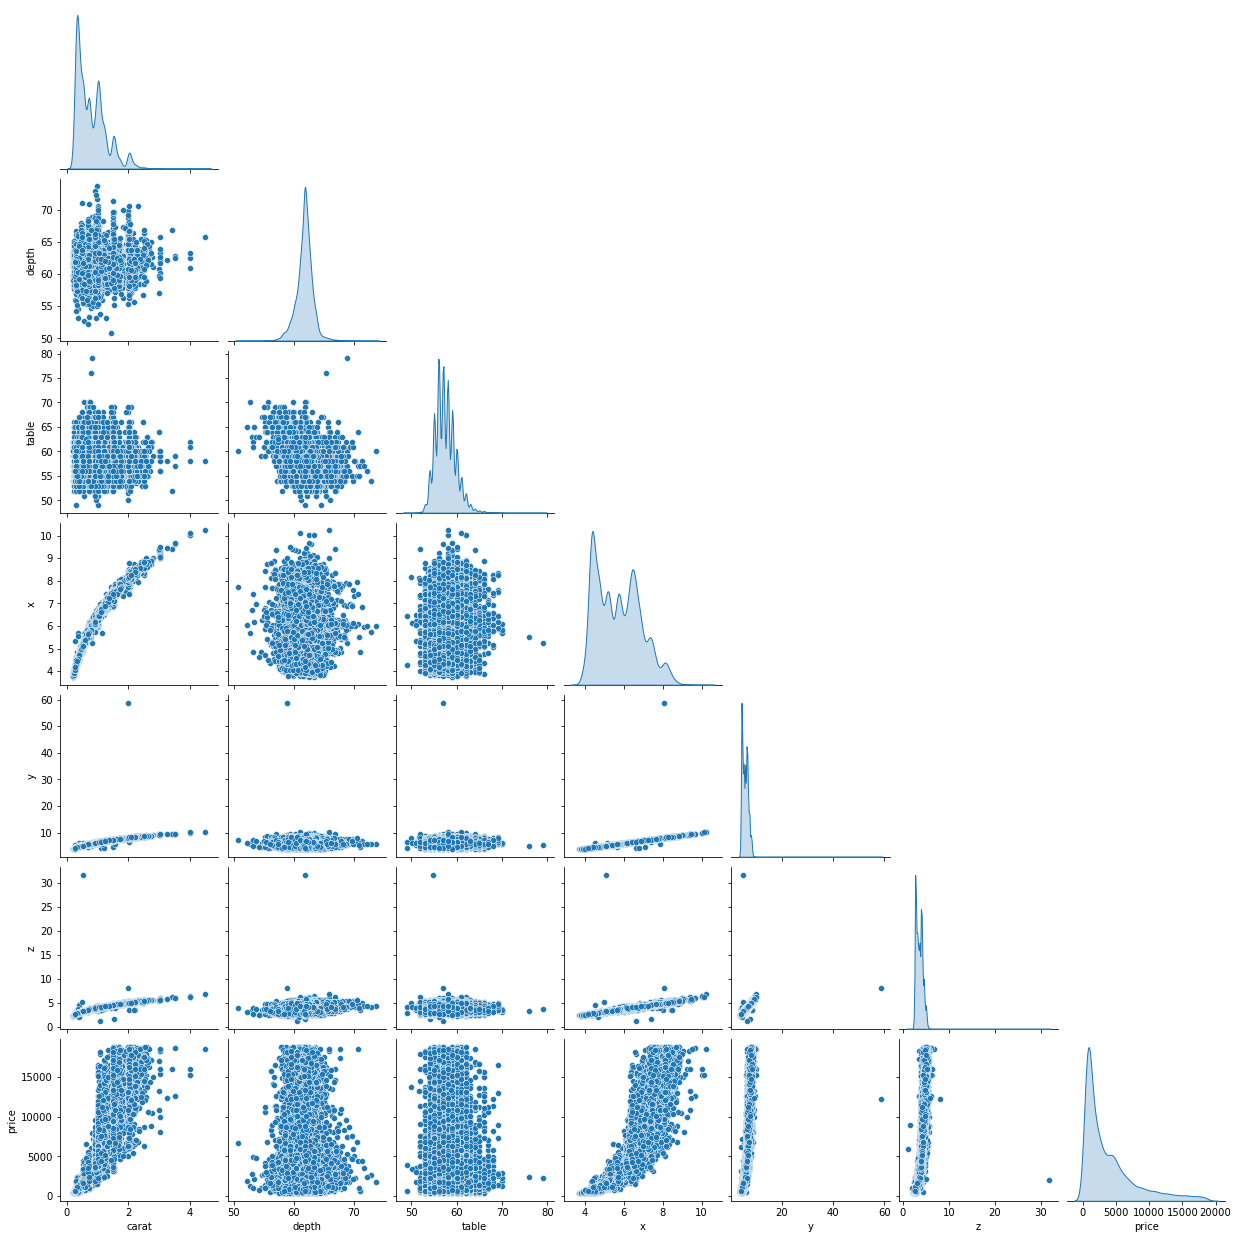

In [26]:
sns.pairplot(data=df, diag_kind='kde', corner=True);

In [27]:
for i in df_cat.columns:
    print('Column Name:', i)
    print('No.s of Unique Valuse:', df[i].nunique())
    print(df[i].value_counts().sort_values())
    print('\n')

Column Name: cut
No.s of Unique Valuse: 5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


Column Name: color
No.s of Unique Valuse: 7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


Column Name: clarity
No.s of Unique Valuse: 8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




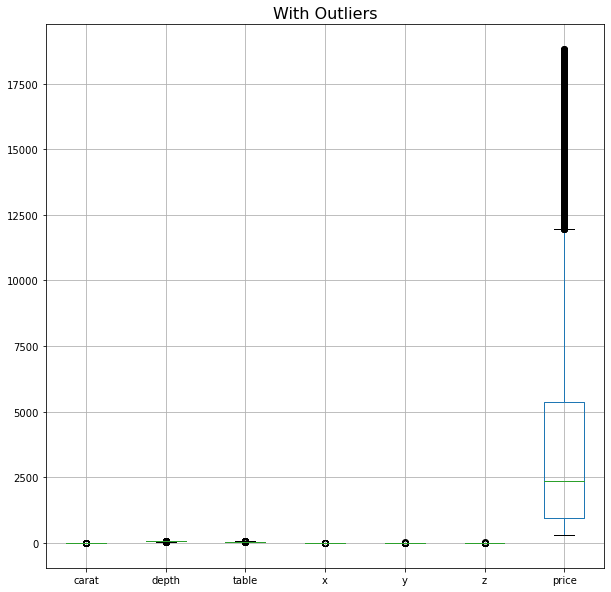

In [28]:
# construct box plot for continuous variables

plt.figure(figsize=(10,10))
df[df_num.columns].boxplot()
plt.title('With Outliers',fontsize=16)
plt.show()

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
for j in df_num.columns:
    lr,ur=remove_outlier(df[j])
    df[j]=np.where(df[j]>ur,ur,df[j])
    df[j]=np.where(df[j]<lr,lr,df[j])

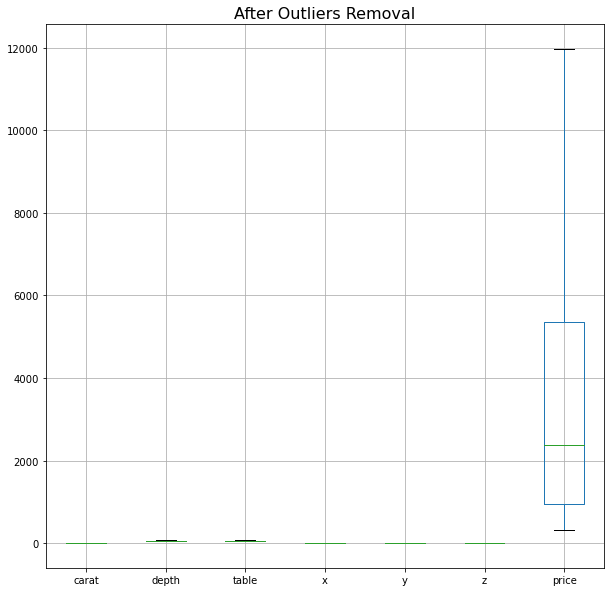

In [31]:
# After outliers treatment of continous variables only

plt.figure(figsize=(10,10))
df[df_num.columns].boxplot()
plt.title('After Outliers Removal',fontsize=16)
plt.show()

In [32]:
# Scaling the continous columns

sc = StandardScaler()
df[df_num.columns] = sc.fit_transform(df_num)

In [33]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,6.79498e-17,1.00002,-1.25309,-0.834004,-0.205374,0.528028,7.75727
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933,NaN,NaN,NaN,1.6124e-15,1.00002,-7.85357,-0.463968,0.0382387,0.540445,8.504
table,26933,NaN,NaN,NaN,-2.57488e-15,1.00002,-3.78831,-0.652274,-0.204268,0.691743,9.65185
x,26933,NaN,NaN,NaN,-9.0273e-16,1.00002,-1.77558,-0.905444,-0.0353103,0.728276,3.99572
y,26933,NaN,NaN,NaN,1.72385e-16,1.00002,-1.73847,-0.870751,-0.028803,0.692867,45.6769
z,26933,NaN,NaN,NaN,-6.85566e-16,1.00002,-3.44151,-0.890504,-0.0262278,0.698649,39.3959
price,26933,NaN,NaN,NaN,-1.11298e-19,1.00002,-0.897836,-0.743951,-0.388449,0.352637,3.69933


In [34]:
# Changing object variable to continous variable to model evaluation

df = pd.get_dummies(df, columns=['cut','color','clarity'], drop_first=True)

In [35]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.253470,0.243737,-1.296116,-1.240177,-1.225062,-0.854828,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.679199,0.243737,-1.162932,-1.094125,-1.169302,-0.734256,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.325214,1.139749,0.275452,0.332032,0.336211,0.584584,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.105249,-0.652274,-0.807776,-0.802020,-0.806864,-0.709892,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.966174,0.691743,-1.225085,-1.119899,-1.239002,-0.785219,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  float64
 7   cut_Good       26933 non-null  uint8  
 8   cut_Ideal      26933 non-null  uint8  
 9   cut_Premium    26933 non-null  uint8  
 10  cut_Very Good  26933 non-null  uint8  
 11  color_E        26933 non-null  uint8  
 12  color_F        26933 non-null  uint8  
 13  color_G        26933 non-null  uint8  
 14  color_H        26933 non-null  uint8  
 15  color_I        26933 non-null  uint8  
 16  color_J        26933 non-null  uint8  
 17  clarity_IF     26933 non-null  uint8  
 18  clarit

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,6.794979e-17,1.000019,-1.253091,-0.834004,-0.205374,0.528028,7.757273
depth,26933.0,1.612401e-15,1.000019,-7.853574,-0.463968,0.038239,0.540445,8.504002
table,26933.0,-2.574881e-15,1.000019,-3.788313,-0.652274,-0.204268,0.691743,9.651855
x,26933.0,-9.027297e-16,1.000019,-1.775577,-0.905444,-0.035310,0.728276,3.995716
y,26933.0,1.723849e-16,1.000019,-1.738473,-0.870751,-0.028803,0.692867,45.676940
z,26933.0,-6.855657e-16,1.000019,-3.441512,-0.890504,-0.026228,0.698649,39.395910
price,26933.0,-1.112985e-19,1.000019,-0.897836,-0.743951,-0.388449,0.352637,3.699331
cut_Good,26933.0,9.040953e-02,0.286773,0.000000,0.000000,0.000000,0.000000,1.000000
cut_Ideal,26933.0,4.011807e-01,0.490147,0.000000,0.000000,0.000000,1.000000,1.000000
cut_Premium,26933.0,2.556715e-01,0.436246,0.000000,0.000000,0.000000,1.000000,1.000000


In [38]:
df.shape

(26933, 24)

In [39]:
# Model Building with scaling done 

x = df.drop('price', axis = 1)
y = df.pop('price')

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [41]:
x_train.shape

(18853, 23)

In [42]:
x_test.shape

(8080, 23)

In [43]:
rm = LinearRegression()

In [44]:
# Best fit model for training dataset

rm.fit(x_train, y_train)

LinearRegression()

In [45]:
# Let us explore the coefficients for each of the independent attributes

d1 = pd.DataFrame({"Feature":x_train.columns,"Coefficients":rm.coef_})
d1

,Feature,Coefficients
0,carat,1.372392
1,depth,-0.023606
2,table,-0.013913
3,x,-0.312816
4,y,-0.001073
5,z,-0.008611
6,cut_Good,0.140776
7,cut_Ideal,0.203298
8,cut_Premium,0.172644
9,cut_Very Good,0.172407


In [46]:
# Let us check the intercept for the model

intercept = rm.intercept_

print('The intercept for our model is', intercept)

The intercept for our model is -1.037184134060611


In [47]:
# R square on training data
rm.score(x_train, y_train)

0.9210209603562228

In [48]:
# R square on testing data
rm.score(x_test, y_test)

0.9224940525680858

In [49]:
#RMSE on Training data
predicted_train = rm.predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2816024251631316

In [50]:
#RMSE on Testing data
predicted_test=rm.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2770740255834901

In [51]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [52]:
vif_df = pd.DataFrame({"Column_Names": x.columns, "VIF_Value": vif})
vif_df.sort_values(by = "VIF_Value").reset_index(drop = True)

,Column_Names,VIF_Value
0,color_J,1.487544
1,depth,1.577976
2,table,1.738635
3,color_I,1.871111
4,clarity_IF,2.198374
5,color_H,2.199529
6,color_F,2.327870
7,color_E,2.370589
8,color_G,2.667334
9,clarity_VVS1,3.439171


In [53]:
# Building Liner Regression model using Stats Model Libraries

data_train = pd.concat([x_train, y_train], axis = 1)
data_test = pd.concat([x_test, y_test], axis = 1)

In [54]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [55]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [56]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [57]:
lm1 = smf.ols(formula = 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()

In [58]:
lm1.params

Intercept       -1.037184
carat            1.372392
depth           -0.023606
table           -0.013913
x               -0.312816
y               -0.001073
z               -0.008611
cut_Good         0.140776
cut_Ideal        0.203298
cut_Premium      0.172644
cut_Very_Good    0.172407
color_E         -0.042717
color_F         -0.060144
color_G         -0.107917
color_H         -0.237775
color_I         -0.364550
color_J         -0.587918
clarity_IF       1.315175
clarity_SI1      0.928252
clarity_SI2      0.685706
clarity_VS1      1.150403
clarity_VS2      1.075287
clarity_VVS1     1.253342
clarity_VVS2     1.244432
dtype: float64

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     9547.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:57:07   Log-Likelihood:                -2859.6
No. Observations:               18853   AIC:                             5767.
Df Residuals:                   18829   BIC:                             5955.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0372      0.022    -46.566

In [60]:
# 2nd Iteration after removing y and z from formula

lm2 = smf.ols(formula = 'price ~ carat + depth + table + x + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()

In [61]:
lm2.params

Intercept       -1.037029
carat            1.372170
depth           -0.024542
table           -0.013833
x               -0.321962
cut_Good         0.140643
cut_Ideal        0.203293
cut_Premium      0.172734
cut_Very_Good    0.172153
color_E         -0.042826
color_F         -0.060141
color_G         -0.107919
color_H         -0.237775
color_I         -0.364522
color_J         -0.587916
clarity_IF       1.315042
clarity_SI1      0.928184
clarity_SI2      0.685628
clarity_VS1      1.150185
clarity_VS2      1.075213
clarity_VVS1     1.253224
clarity_VVS2     1.244340
dtype: float64

In [62]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:57:15   Log-Likelihood:                -2860.4
No. Observations:               18853   AIC:                             5765.
Df Residuals:                   18831   BIC:                             5937.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0370      0.022    -46.565

In [67]:
mse = np.mean((lm2.predict(data_train.drop('price', axis=1))-data_train['price'])**2)

In [68]:
# Root Mean Squared Error(mse)
np.sqrt(mse)

0.2816146595342954

In [69]:
# Prediction on test data
y_pred = lm2.predict(data_test)

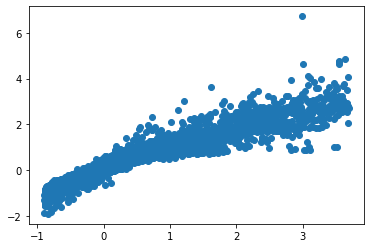

In [70]:
# We can visualise actual y Vs predicted y for test data set

plt.scatter(y_test, y_pred)
plt.show()

In [74]:
for i,j in np.array(lm2.params.reset_index()):
    print('{} * {} + '.format(round(j,2),i),end=' ')

-1.04 * Intercept +  1.37 * carat +  -0.02 * depth +  -0.01 * table +  -0.32 * x +  0.14 * cut_Good +  0.2 * cut_Ideal +  0.17 * cut_Premium +  0.17 * cut_Very_Good +  -0.04 * color_E +  -0.06 * color_F +  -0.11 * color_G +  -0.24 * color_H +  -0.36 * color_I +  -0.59 * color_J +  1.32 * clarity_IF +  0.93 * clarity_SI1 +  0.69 * clarity_SI2 +  1.15 * clarity_VS1 +  1.08 * clarity_VS2 +  1.25 * clarity_VVS1 +  1.24 * clarity_VVS2 +  

In [71]:
# Question 2 Codes 

In [72]:
df2 = pd.read_csv('Holiday_Package.csv')

In [73]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [74]:
df2.drop("Unnamed: 0", axis=1, inplace =True)
df2

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [75]:
df2.shape

(872, 7)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [77]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [78]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [79]:
df2.duplicated().sum()

0

In [80]:
# Checking for all values - 0 in columns

for i in df2.columns:
    print("Column Name:", i, "-", (df2[i] == 0).sum())

Column Name: Holliday_Package - 0
Column Name: Salary - 0
Column Name: age - 0
Column Name: educ - 0
Column Name: no_young_children - 665
Column Name: no_older_children - 393
Column Name: foreign - 0


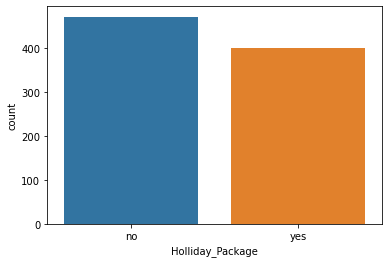

In [81]:
# Categorical Variable

# Target Variable to predict

sns.countplot('Holliday_Package', data = df2);

In [82]:
df2['Holliday_Package'].value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [83]:
df2['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

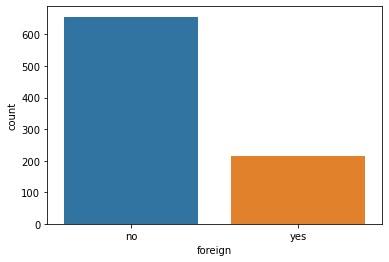

In [84]:
sns.countplot('foreign', data = df2);

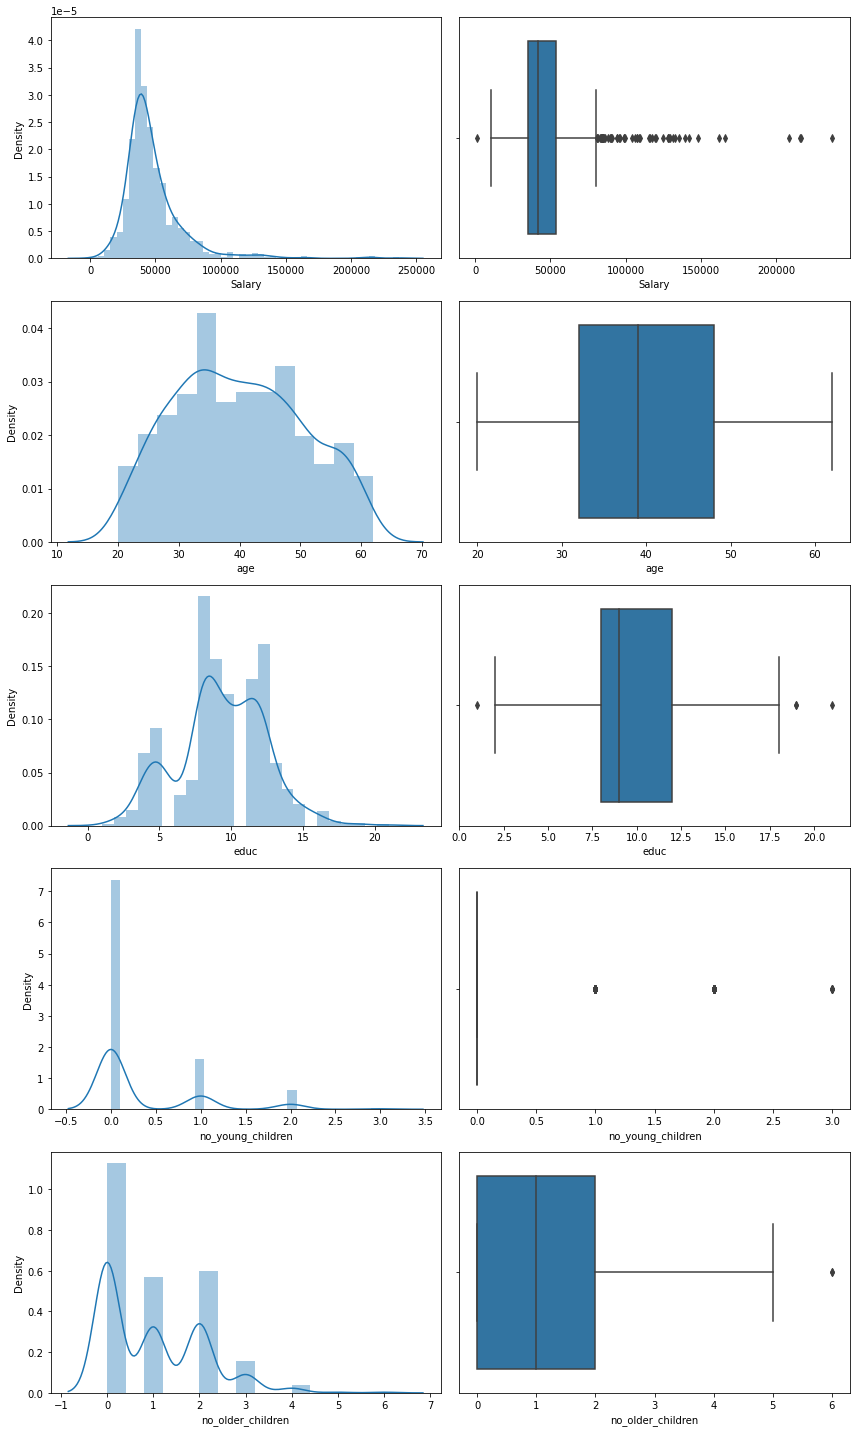

In [85]:
# Continous Variable

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 20)

a = sns.distplot(df2['Salary'] , ax=axes[0][0])
a = sns.boxplot(df2['Salary'] , orient = "v" , ax=axes[0][1])

a = sns.distplot(df2['age'] , ax=axes[1][0])
a = sns.boxplot(df2['age'] , orient = "v" , ax=axes[1][1])

a = sns.distplot(df2['educ'] , ax=axes[2][0])
a = sns.boxplot(df2['educ'] , orient = "v" , ax=axes[2][1])

a = sns.distplot(df2['no_young_children'] , ax=axes[3][0])
a = sns.boxplot(df2['no_young_children'] , orient = "v" , ax=axes[3][1])

a = sns.distplot(df2['no_older_children'] , ax=axes[4][0])
a = sns.boxplot(df2['no_older_children'] , orient = "v" , ax=axes[4][1])

fig.tight_layout()

In [86]:
df2.skew() 

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

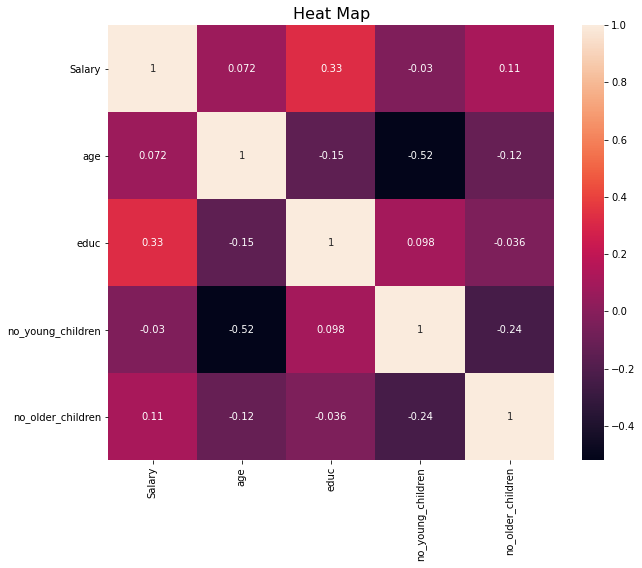

In [87]:
# Bi variant analysis

plt.figure(figsize = (10,8))
plt.title('Heat Map', fontsize = 16)
sns.heatmap(df2.corr(),annot=True)
plt.show()

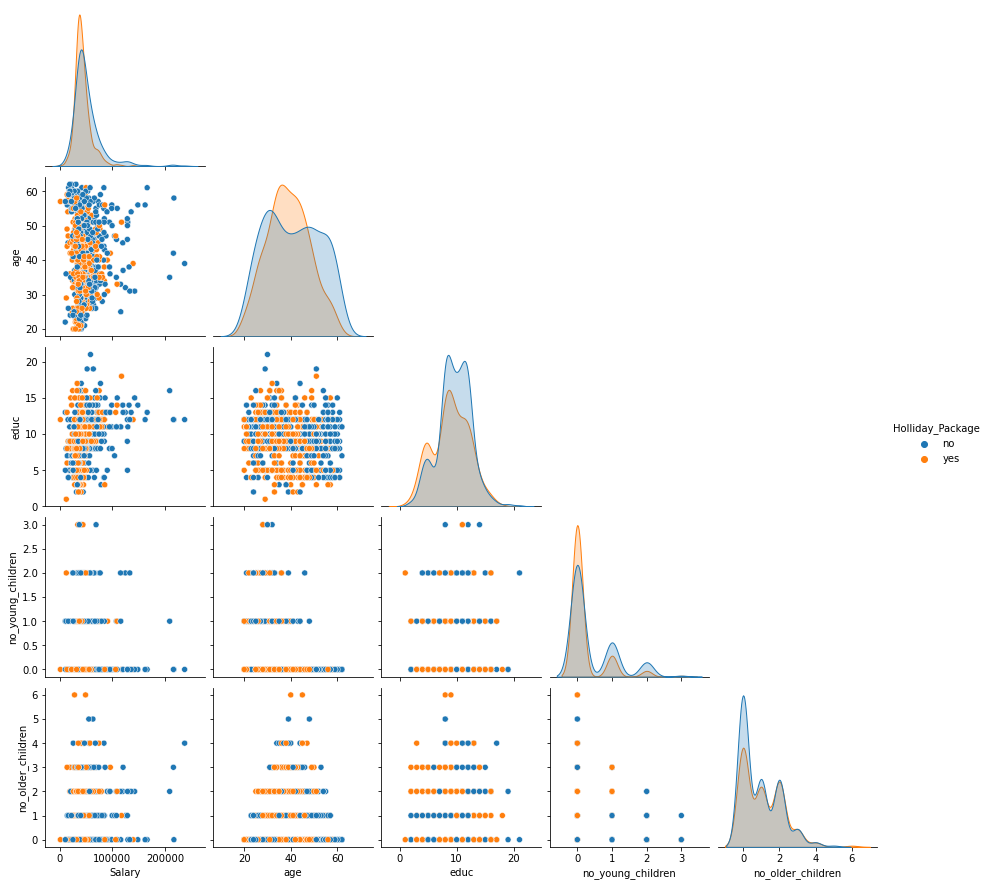

In [88]:
sns.pairplot(data=df2, diag_kind='kde', corner=True, hue = 'Holliday_Package');

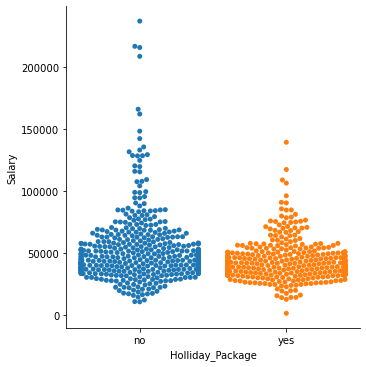

In [89]:
sns.catplot(x = 'Holliday_Package', y = 'Salary', kind = 'swarm', data = df2)

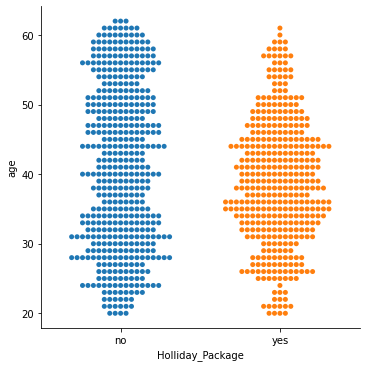

In [90]:
sns.catplot(x = 'Holliday_Package', y = 'age', kind = 'swarm', data = df2)

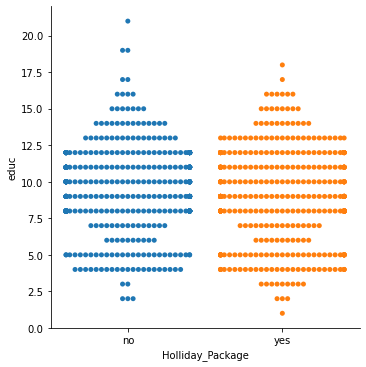

In [91]:
sns.catplot(x = 'Holliday_Package', y = 'educ', kind = 'swarm', data = df2)

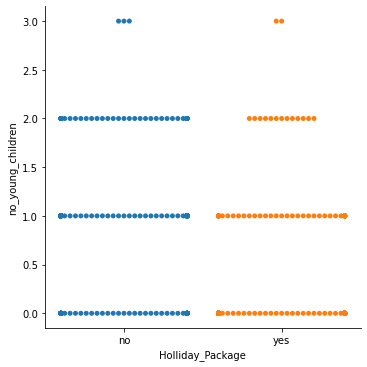

In [92]:
sns.catplot(x = 'Holliday_Package', y = 'no_young_children', kind = 'swarm', data = df2)

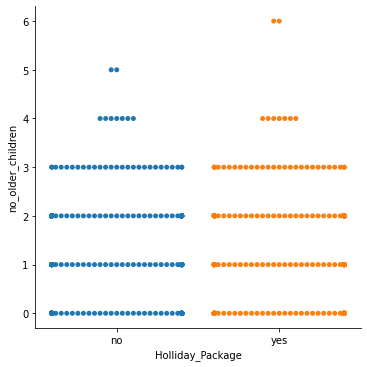

In [93]:
sns.catplot(x = 'Holliday_Package', y = 'no_older_children', kind = 'swarm', data = df2)

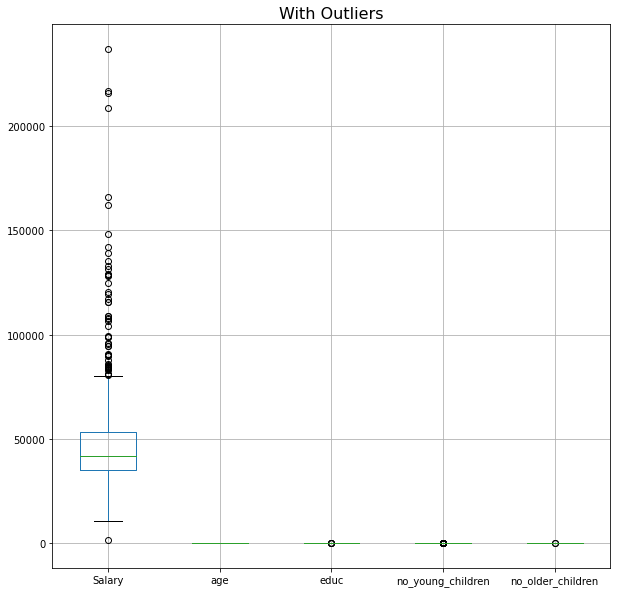

In [94]:
# construct box plot for continuous variables

df2_num = df2.select_dtypes(include = ['int64'])
plt.figure(figsize=(10,10))
df2[df2_num.columns].boxplot()
plt.title('With Outliers',fontsize=16)
plt.show()

In [95]:
for j in df2_num.columns:
    lr,ur=remove_outlier(df2[j])
    df2[j]=np.where(df2[j]>ur,ur,df2[j])
    df2[j]=np.where(df2[j]<lr,lr,df2[j])

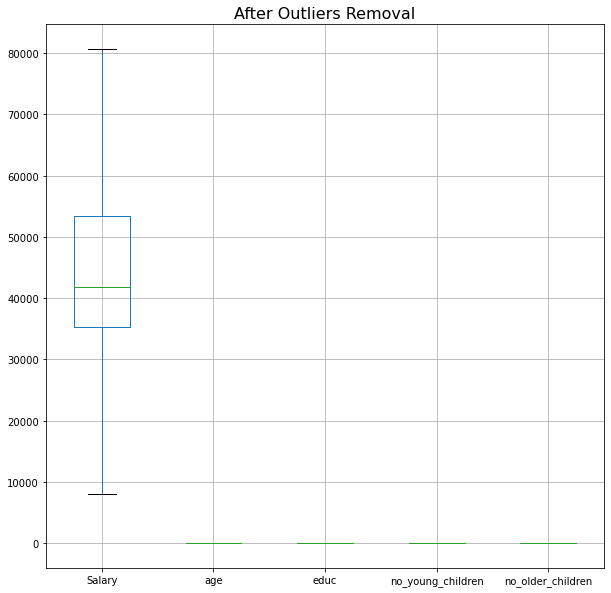

In [96]:
# After outliers treatment of continous variables only

plt.figure(figsize=(10,10))
df2[df2_num.columns].boxplot()
plt.title('After Outliers Removal',fontsize=16)
plt.show()

In [97]:
df2 = pd.get_dummies(df2, columns = ['Holliday_Package','foreign'], drop_first = True)

In [98]:
df2.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                872 non-null    float64
 1   age                   872 non-null    float64
 2   educ                  872 non-null    float64
 3   no_young_children     872 non-null    float64
 4   no_older_children     872 non-null    float64
 5   Holliday_Package_yes  872 non-null    uint8  
 6   foreign_yes           872 non-null    uint8  
dtypes: float64(5), uint8(2)
memory usage: 35.9 KB


In [100]:
x2 = df2.drop('Holliday_Package_yes', axis = 1)
y2 = df2.pop('Holliday_Package_yes')

In [101]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 123)

In [102]:
grid = {'penalty': ['l1', 'l2', 'none'],
        'solver': ['sag', 'lbfgs', 'liblinear'],
        'tol': [0.0001, 0.00001]}

In [103]:
logr = LogisticRegression(max_iter=100000,n_jobs=2)

In [104]:
grid_search_logr = GridSearchCV(estimator = logr, param_grid = grid, cv = 3, n_jobs = 2, scoring = 'f1')

In [105]:
grid_search_logr.fit(x2_train, y2_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [106]:
grid_search_logr.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}

In [107]:
final_lr = grid_search_logr.best_estimator_
final_lr

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-05)

In [108]:
# For Training

final_lr.fit(x2_train, y2_train)

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-05)

In [109]:
y_train_pred = final_lr.predict(x2_train)

Accuracy for Logistic Regression model for train data is: 0.6360655737704918


Classification report for Logistic Regression model for train data is: 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       331
           1       0.64      0.47      0.54       279

    accuracy                           0.64       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.64      0.63       610



Confusion Matrix for Logistic Regression model for train data is:


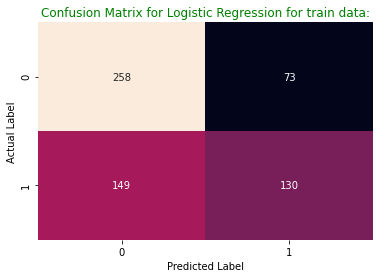

In [110]:
print('Accuracy for {} model for train data is:'.format('Logistic Regression'),final_lr.score(x2_train,y2_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Logistic Regression'),'\n',classification_report(y2_train,y_train_pred))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Logistic Regression'))
sns.heatmap(confusion_matrix(y2_train,y_train_pred),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Logistic Regression'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [111]:
# For Test Set

final_lr.fit(x2_test, y2_test)

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-05)

In [112]:
y_test_pred = final_lr.predict(x2_test)

Accuracy for Logistic Regression model for test data is: 0.6526717557251909


Classification report for Logistic Regression model for test data is: 
               precision    recall  f1-score   support

           0       0.63      0.86      0.73       140
           1       0.72      0.41      0.52       122

    accuracy                           0.65       262
   macro avg       0.68      0.64      0.63       262
weighted avg       0.67      0.65      0.63       262



Confusion Matrix for Logistic Regression model for test data is:


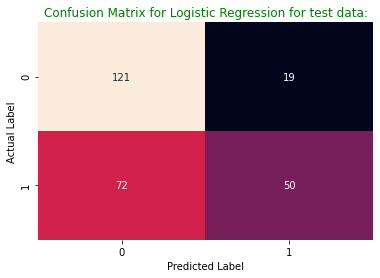

In [118]:
print('Accuracy for {} model for test data is:'.format('Logistic Regression'),final_lr.score(x2_test,y2_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Logistic Regression'),'\n',classification_report(y2_test,y_test_pred))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Logistic Regression'))
sns.heatmap(confusion_matrix(y2_test,y_test_pred),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Logistic Regression'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [114]:
y_train_prob = final_lr.predict_proba(x2_train)[:,1]
y_test_prob = final_lr.predict_proba(x2_test)[:,1]

In [115]:
auc_train = roc_auc_score(y2_train,y_train_prob)
auc_test = roc_auc_score(y2_test,y_test_prob)
print('AUC Score for train data is:',round(auc_train,2))
print('AUC Score for test data is :',round(auc_test,2))

AUC Score for train data is: 0.66
AUC Score for test data is : 0.68


In [116]:
fpr_train, tpr_train, thresholds_train = roc_curve(y2_train,y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y2_test,y_test_prob)

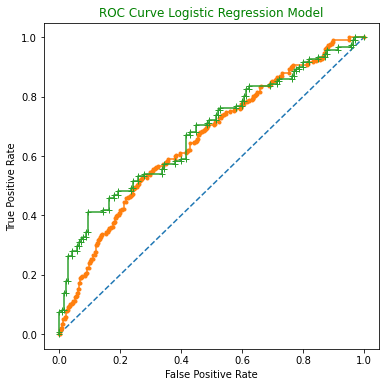

In [117]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_train, tpr_train, marker = '.');
plt.plot(fpr_test, tpr_test, marker = '+');
plt.title('ROC Curve Logistic Regression Model', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [109]:
# Now using LDA model for the same train and test set

In [110]:
lda = LinearDiscriminantAnalysis()

In [111]:
# For training set

lda_model = lda.fit(x2_train, y2_train)

In [112]:
y_train_pred_lda = lda_model.predict(x2_train)

Accuracy for Linear Discriminant Analysis model for train data is: 0.6344262295081967


Classification report for Linear Discriminant Analysis model for train data is: 
               precision    recall  f1-score   support

           0       0.63      0.79      0.70       331
           1       0.64      0.46      0.53       279

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



Confusion Matrix for Linear Discriminant Analysis model for train data is:


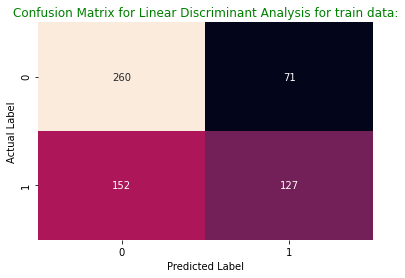

In [113]:
print('Accuracy for {} model for train data is:'.format('Linear Discriminant Analysis'),lda_model.score(x2_train,y2_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Linear Discriminant Analysis'),'\n',classification_report(y2_train,y_train_pred_lda))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Linear Discriminant Analysis'))
sns.heatmap(confusion_matrix(y2_train,y_train_pred_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Linear Discriminant Analysis'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [114]:
# For testing set

lda_model = lda.fit(x2_test, y2_test)

In [115]:
y_test_pred_lda = lda_model.predict(x2_test)

Accuracy for Linear Discriminant Analysis model for test data is: 0.6564885496183206


Classification report for Linear Discriminant Analysis model for test data is: 
               precision    recall  f1-score   support

           0       0.63      0.87      0.73       140
           1       0.74      0.41      0.53       122

    accuracy                           0.66       262
   macro avg       0.68      0.64      0.63       262
weighted avg       0.68      0.66      0.64       262



Confusion Matrix for Linear Discriminant Analysis model for test data is:


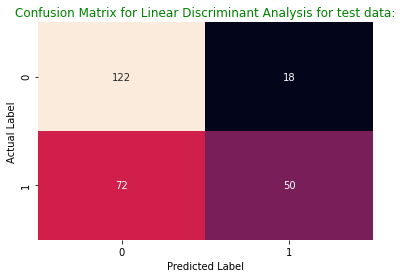

In [116]:
print('Accuracy for {} model for test data is:'.format('Linear Discriminant Analysis'),lda_model.score(x2_test,y2_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Linear Discriminant Analysis'),'\n',classification_report(y2_test,y_test_pred_lda))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Linear Discriminant Analysis'))
sns.heatmap(confusion_matrix(y2_test,y_test_pred_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Linear Discriminant Analysis'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [117]:
y_train_lda_prob = lda_model.predict_proba(x2_train)[:,1]
y_test_lda_prob = lda_model.predict_proba(x2_test)[:,1]

In [118]:
auc_train = roc_auc_score(y2_train,y_train_lda_prob)
auc_test = roc_auc_score(y2_test,y_test_lda_prob)
print('AUC Score for train data is:',round(auc_train,2))
print('AUC Score for test data is :',round(auc_test,2))

AUC Score for train data is: 0.66
AUC Score for test data is : 0.68


In [119]:
fpr_lda_train, tpr_lda_train, thresholds_lda_train = roc_curve(y2_train, y_train_lda_prob)
fpr_lda_test, tpr_lda_test, thresholds_lda_test = roc_curve(y2_test, y_test_lda_prob)

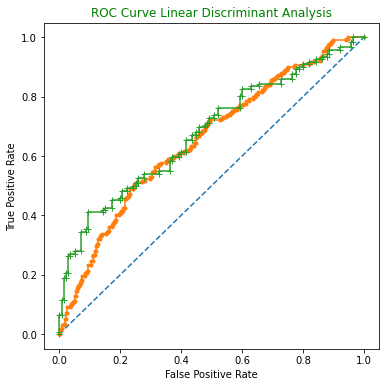

In [120]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_lda_train, tpr_lda_train, marker = '.');
plt.plot(fpr_lda_test, tpr_lda_test, marker = '+');
plt.title('ROC Curve Linear Discriminant Analysis', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Cut-off Value: 0.1 

Accuracy Score 0.4574
F1 Score 0.6277 

Confusion Matrix


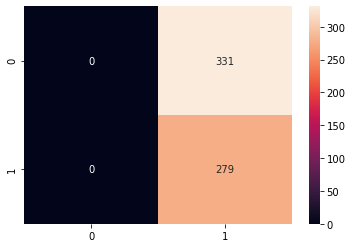

Cut-off Value: 0.2 

Accuracy Score 0.4705
F1 Score 0.6334 

Confusion Matrix


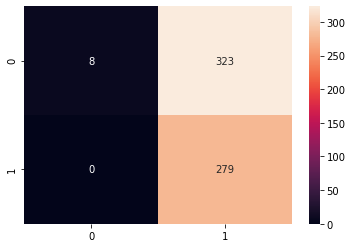

Cut-off Value: 0.3 

Accuracy Score 0.5377
F1 Score 0.6421 

Confusion Matrix


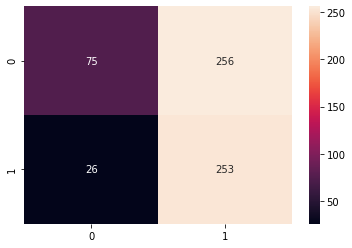

Cut-off Value: 0.4 

Accuracy Score 0.618
F1 Score 0.5802 

Confusion Matrix


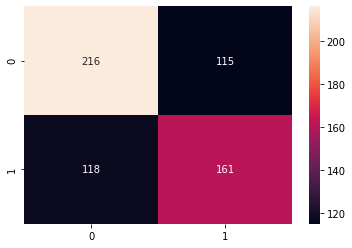

Cut-off Value: 0.5 

Accuracy Score 0.618
F1 Score 0.4644 

Confusion Matrix


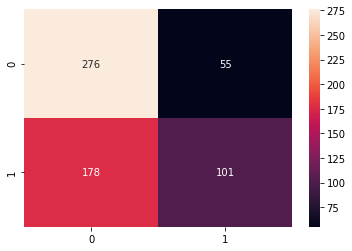

Cut-off Value: 0.6 

Accuracy Score 0.6148
F1 Score 0.4444 

Confusion Matrix


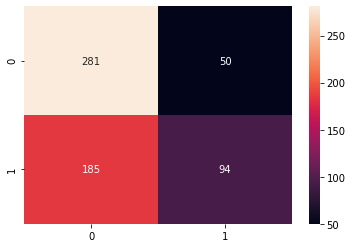

Cut-off Value: 0.7 

Accuracy Score 0.6213
F1 Score 0.4434 

Confusion Matrix


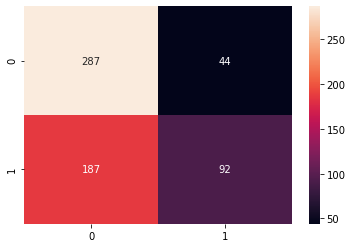

Cut-off Value: 0.8 

Accuracy Score 0.5508
F1 Score 0.0552 

Confusion Matrix


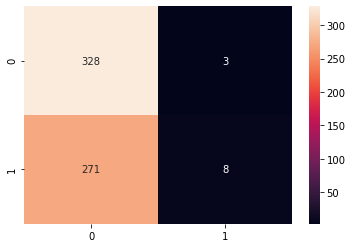

Cut-off Value: 0.9 

Accuracy Score 0.5426
F1 Score 0.0 

Confusion Matrix


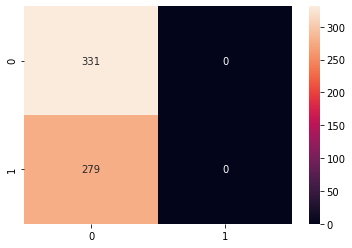

In [121]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]
    for i in range(0,len(y2_train)):                            #defining a loop for the length of the train data
        if np.array(y_train_lda_prob)[i] > custom_prob:    #issuing a condition for our probability values to be 
            a=1               #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0               #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)
    print('Cut-off Value:', round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y2_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y2_train,custom_cutoff_data),4),'\n')
    print('Confusion Matrix')
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y2_train,custom_cutoff_data),annot=True,fmt='.4g')
    plt.show();

In [122]:
test_pred_custom=[]
for i in range(0,len(y_test_lda_prob)):
    if np.array(y_test_lda_prob)[i] > 0.3:
        a=1
    else:
        a=0
    test_pred_custom.append(a)

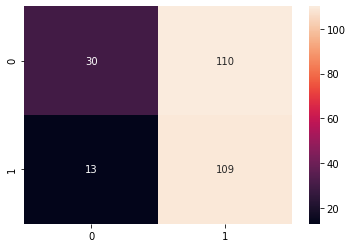

In [123]:
sns.heatmap((confusion_matrix(y2_test,test_pred_custom)),annot=True,fmt='.5g');

In [124]:
print('Classification Report of the default cut-off test data:\n\n',classification_report(y2_test,y_test_pred_lda),'\n')
print('-----------------------------------------------------------')
print('\n')
print('Classification Report of the custom cut-off test data:\n\n',classification_report(y2_test,test_pred_custom),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.87      0.73       140
           1       0.74      0.41      0.53       122

    accuracy                           0.66       262
   macro avg       0.68      0.64      0.63       262
weighted avg       0.68      0.66      0.64       262
 

-----------------------------------------------------------


Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.70      0.21      0.33       140
           1       0.50      0.89      0.64       122

    accuracy                           0.53       262
   macro avg       0.60      0.55      0.48       262
weighted avg       0.60      0.53      0.47       262
 



In [125]:
##### END